In [1]:
#!pip install scikit-learn

In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.0.2'

In [4]:
print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



In [5]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'get_config',
 'logger',
 'logging',
 'os',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'sys',
 'utils']

In [6]:
sklearn.__all__

['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

# Simple Linear Regression

__Aim__:

Predicting the percentage of marks that a student scores based upon the number of hours they have studied.

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv("student_scores.csv")   #pd.read_excel("file_name.xlsx")
dataset.shape

(25, 2)

In [10]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


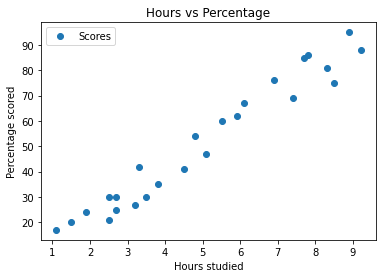

In [12]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

In [13]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
# prepare my data
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,1]

In [15]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
X.shape

(25, 1)

In [16]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [70]:
y.shape

(25,)

In [24]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
X_train.head()

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7


In [26]:
y_train.head()

24    86
23    76
14    17
1     47
10    85
Name: Scores, dtype: int64

In [27]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [28]:
y_test.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [29]:
X_train.shape

(18, 1)

In [30]:
X_test.shape

(7, 1)

We will use the linear_model library from sklearn to build the model.

In [31]:
# Instatntiating and Training the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Intercept:",regressor.intercept_)

Intercept: 1.9322042531516601


In [33]:
print("Slope:",regressor.coef_)

Slope: [9.94167834]


### Equation of best fit line: y = 9.94167834 * x + 1.932204253151646

### Interpretation: Increase in 1 unit of X, variable Y is increased by 9.94 units(coeff)

In [34]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [35]:
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [ ]:
# visualizing the results.
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, 9.9417 * X_train + 1.9322, 'r')
plt.show()

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

In [85]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


In [86]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_aver

In [87]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.9367661043365055


In [88]:
type(float((metrics.r2_score(y_test, y_pred))))

float

In [89]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.9156881391153407


### Implementation of simple linear regression using statsmodel-To undertsand the statistical summary

Statsmodels fits a line on the dataset which passes through the origin. To have an intercept, you need to manually use the add_constant attribute of statsmodels. After adding the constant to the X_train dataset, you fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [90]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) #add constant to the regression line
model = sm.OLS(y_train, X_train_sm).fit() #Fit the resgression line using 'OLS'
model.params

const    1.932204
Hours    9.941678
dtype: float64

In [36]:
#Without constant
# import statsmodels.api as sm
# model = sm.OLS(y_train, X_train).fit() #Fit the resgression line using 'OLS'
# model.params

In [91]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     294.4
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.00e-11
Time:                        19:27:43   Log-Likelihood:                -56.886
No. Observations:                  18   AIC:                             117.8
Df Residuals:                      16   BIC:                             119.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9322      3.494      0.553      0.5

###  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
The coefficient for number of hours is  9.941678, 
with a very low p value which means the coefficient is statistically significant.
2. R-squared
R - squared - 0.948
Meaning that 94.8% of the variance in `marks obtained` is explained by `Number of hours studied`

3. F statistic and its significance
F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

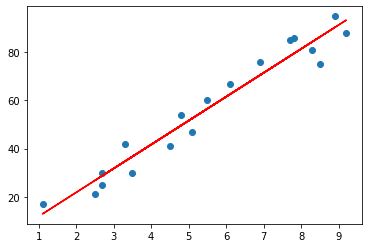

In [92]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 9.9417 * X_train + 1.9322, 'r')
plt.show()

### Residual Analysis

To check: If error terms are normally distributed

In [93]:
y_train_pred = model.predict(X_train_sm)
res = (y_train - y_train_pred)

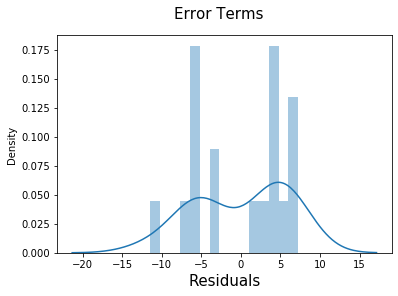

In [94]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 15)         # X-label
plt.show()

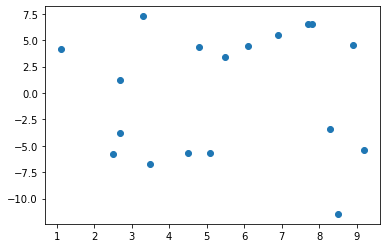

In [95]:
plt.scatter(X_train,res)
plt.show()

### Residuals don't have any pattern
### It is scattered around 0

Predict on test data

In [96]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

In [97]:
y_pred.head()

5     16.844722
2     33.745575
19    75.500624
16    26.786400
11    60.588106
dtype: float64

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Evaluation on test data
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

4.50920432836881

In [99]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9367661043365054

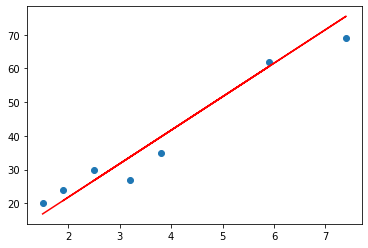

In [100]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 9.9417 * X_test + 1.9322, 'r')
plt.show()

In [101]:
#Adjusted Rsquare manually
#N is the number of points in your data sample. K is the number of independent regressors

r2 = (metrics.r2_score(y_test, y_pred))
n = 18
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.932813985857537


### Scaling
- Min-Max scaling (0-1)
- Standard scaling(mean-0, sigma-1)

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [103]:
X_train

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2
18,6.1
4,3.5


In [104]:
# 'fit_transform' can be performed on 2D arrays only. 
#So reshape your 'X_train' and 'y_trained' data in order to perform the standardisation.
X_train_scaling = X_train.values.reshape(-1,1)
y_train_scaling = y_train.values.reshape(-1,1)

In [105]:
y_train_scaling

array([[86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]], dtype=int64)

In [106]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaling)
y_train_scaled = scaler.fit_transform(y_train_scaling)

In [107]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.1587669923266933e-17 0.9999999999999999
mean and sd for y_train_scaled: 8.635067969306773e-17 0.9999999999999999


In [108]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

model_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [109]:
# Check the parameters
model_scaled.params

array([8.32667268e-17, 9.73884452e-01])

In [110]:
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     294.4
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.00e-11
Time:                        19:28:46   Log-Likelihood:                 1.1461
No. Observations:                  18   AIC:                             1.708
Df Residuals:                      16   BIC:                             3.489
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.327e-17      0.057   1.47e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scaling?
- Helps with interpretation 
- Faster convergence of gradient descent

## Multiple Linear Regression Model

### Data set is available at https://archive.ics.uci.edu/ml/datasets/auto+mpg
### AIM: To predict vehicle mileage in miles per gallon(mpg) based on three predictors

In [158]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [159]:
car_mpg = pd.read_csv("mpg_data.csv")

In [160]:
car_mpg.shape

(398, 9)

In [161]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,america,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,america,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,america,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,america,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,america,"""ford torino"""


In [162]:
col_names = ["mpg","cylinders",
             "displacement",
             "hp",
             "weight",
             "acceleration",
             "model_year",
             "origin",
             "car_name"]    

In [163]:
car_mpg.columns = col_names
car_mpg.head()

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,america,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,america,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,america,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,america,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,america,"""ford torino"""


In [164]:
car_mpg['weight'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [120]:
car_mpg['car_name'].nunique()

305

In [165]:
#Lets drop the car column
car_mpg.drop(columns=['car_name'],inplace=True)

In [166]:
car_mpg.head()

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [167]:
car_mpg['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [168]:
car_mpg.loc[car_mpg['hp'] == '?']

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [169]:
list(car_mpg.loc[car_mpg['hp'] == '?'].index)

[32, 126, 330, 336, 354, 374]

In [170]:
car_mpg.drop(list(car_mpg.loc[car_mpg['hp'] == '?'].index),inplace=True)

In [171]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
hp               object
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [172]:
car_mpg['hp'] = car_mpg['hp'].astype(int)

In [173]:
car_mpg['hp'] = car_mpg['hp'].apply(lambda x : int(x))

In [174]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
hp                int64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [175]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
hp                int64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [176]:
car_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
hp              0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

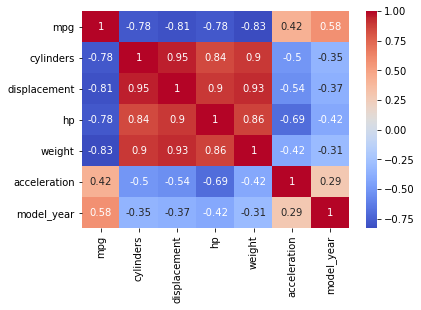

In [177]:
sns.heatmap(car_mpg.corr(),
            annot=True,
            yticklabels=True,
            cmap='coolwarm')

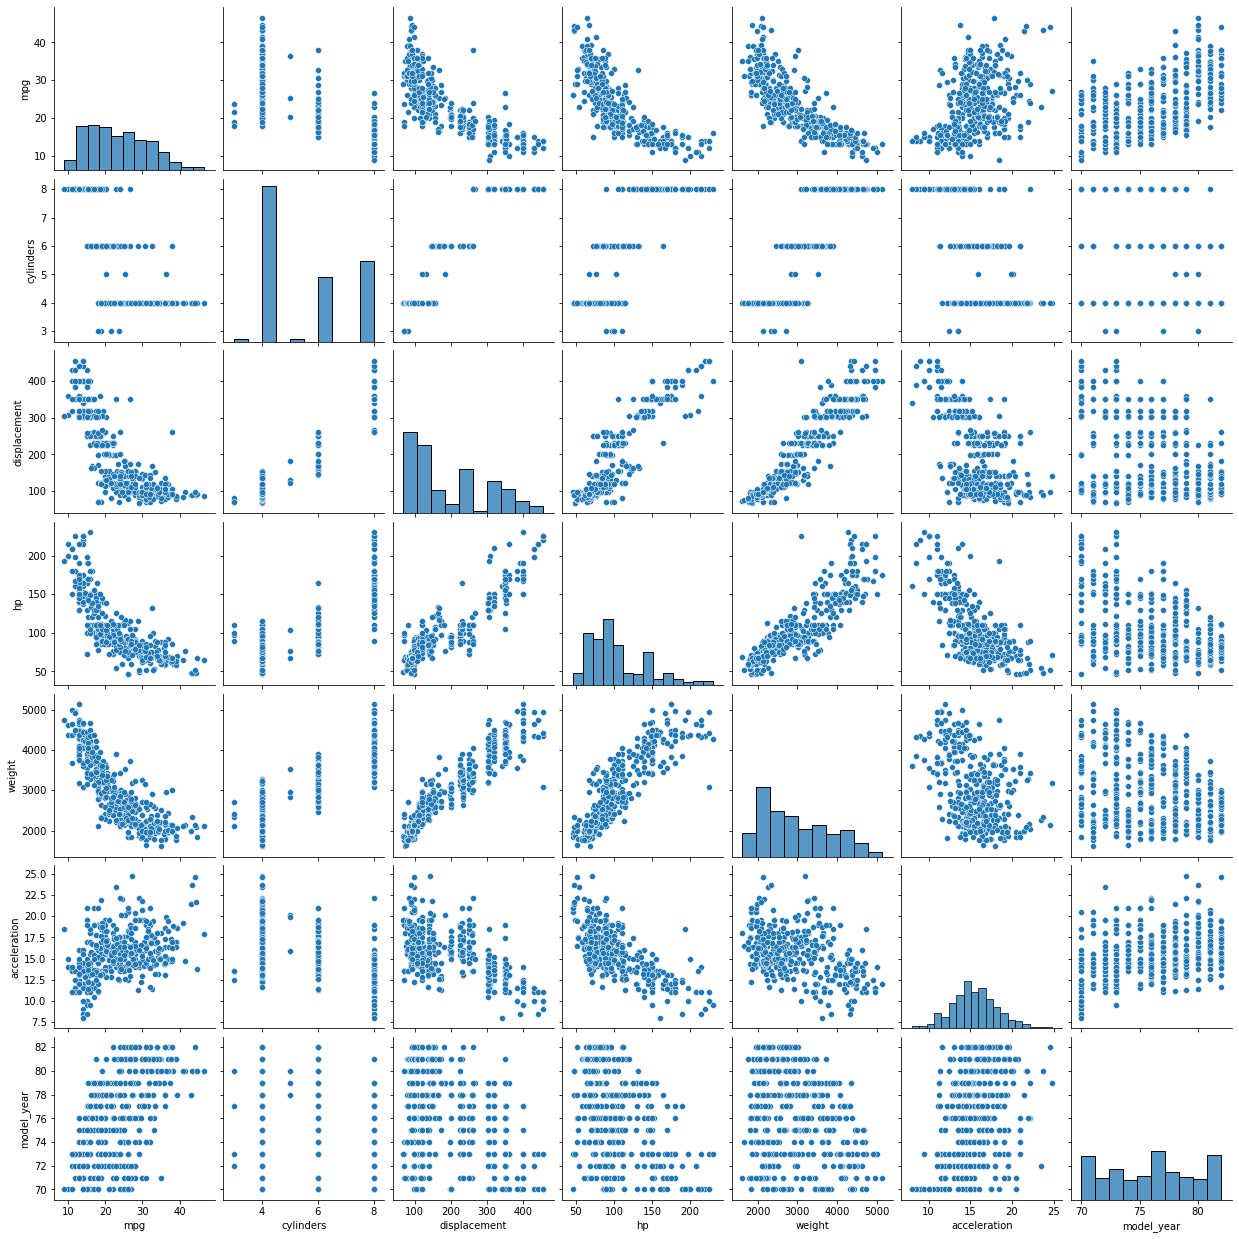

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(car_mpg)
plt.show()

In [178]:
car_mpg['origin'].unique()

array(['america', 'asia', 'europe'], dtype=object)

### Two ways to deal the categorical variables:
- Mapping (order is important)-Binary values
- Dummy variables (Be careful of multicollinearity)

### Mapping/Encoding-Binary

In [179]:
#car_mpg['origin1']=car_mpg['origin'].replace({'america': 1,'europe':2, 'asia':3})

In [180]:
car_mpg

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


### Dummy Variables

The variable `origin` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [181]:
# Get the dummy variables for the feature 'origin' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(car_mpg['origin'])

In [182]:
dummy

,america,asia,europe
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,0,1
395,1,0,0
396,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `america`
- `01` will correspond to `europe`
- `10` will correspond to `asia`

In [183]:
dummy = pd.get_dummies(car_mpg['origin'], drop_first = True)

In [184]:
dummy

,asia,europe
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
393,0,0
394,0,1
395,0,0
396,0,0


In [185]:
# Add the results to the original dataframe

car_mpg = pd.concat([car_mpg, dummy], axis = 1)

In [186]:
car_mpg

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,asia,europe
0,18.0,8,307.0,130,3504,12.0,70,america,0,0
1,15.0,8,350.0,165,3693,11.5,70,america,0,0
2,18.0,8,318.0,150,3436,11.0,70,america,0,0
3,16.0,8,304.0,150,3433,12.0,70,america,0,0
4,17.0,8,302.0,140,3449,10.5,70,america,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america,0,0
394,44.0,4,97.0,52,2130,24.6,82,europe,0,1
395,32.0,4,135.0,84,2295,11.6,82,america,0,0
396,28.0,4,120.0,79,2625,18.6,82,america,0,0


In [187]:
# Drop 'origin' as we have created the dummies for it

car_mpg.drop(['origin'], axis = 1, inplace = True)

In [188]:
car_mpg

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,asia,europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1
395,32.0,4,135.0,84,2295,11.6,82,0,0
396,28.0,4,120.0,79,2625,18.6,82,0,0


In [189]:
# Divide the dataset in features & target variable

X = car_mpg.drop(columns=['mpg'])
y = car_mpg['mpg']

In [190]:
X.head()

,cylinders,displacement,hp,weight,acceleration,model_year,asia,europe
0,8,307.0,130,3504,12.0,70,0,0
1,8,350.0,165,3693,11.5,70,0,0
2,8,318.0,150,3436,11.0,70,0,0
3,8,304.0,150,3433,12.0,70,0,0
4,8,302.0,140,3449,10.5,70,0,0


In [191]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [192]:
#Divide the dataset in Train & Test split
#total 100 records 20 records will go in TEST & TRAIN will have 80 total 100%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=101)

In [193]:
#check train split
X_train.head()

,cylinders,displacement,hp,weight,acceleration,model_year,asia,europe
119,4,114.0,91,2582,14.0,73,0,1
378,4,105.0,63,2125,14.7,82,0,0
132,4,140.0,75,2542,17.0,74,0,0
16,6,199.0,97,2774,15.5,70,0,0
207,4,130.0,102,3150,15.7,76,0,1


### Scaling


Scaling doesn't affect the model as we saw in simple linear regression. Here we see weight column has bigger integer value as compared to other features. So it is very important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- Min-Max scaling 
- Standard scaling(mean-0, sigma-1)

In [194]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric = ['displacement', 'hp', 'weight', 'acceleration']

X_train[numeric] = scaler.fit_transform(X_train[numeric])

In [195]:
X_train

,cylinders,displacement,hp,weight,acceleration,model_year,asia,europe
119,4,-0.706904,-0.288800,-0.406167,-0.602837,73,0,1
378,4,-0.795021,-1.020084,-0.950519,-0.351543,82,0,0
132,4,-0.452343,-0.706677,-0.453813,0.474137,74,0,0
16,6,0.125316,-0.132097,-0.177468,-0.064350,70,0,0
207,4,-0.550251,-0.001510,0.270401,0.007448,76,0,1
...,...,...,...,...,...,...,...,...
64,8,1.290424,1.252119,1.443677,-0.782333,72,0,0
328,4,-0.393598,-0.915615,0.389516,2.197296,80,0,1
341,6,-0.129245,0.207428,-0.235834,-1.105425,81,0,0
11,8,1.505822,1.513292,0.817136,-2.756785,70,0,0


In [196]:
#Target variable
y_train.head()

119    20.0
378    38.0
132    25.0
16     18.0
207    20.0
Name: mpg, dtype: float64

In [197]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

model.params

cylinders      -1.479718
displacement    3.426192
hp             -1.253353
weight         -5.152592
acceleration    0.229594
model_year      0.406038
asia            2.701223
europe          2.076184
dtype: float64

In [198]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1686.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                   1.14e-235
Time:                        20:17:23   Log-Likelihood:                         -795.79
No. Observations:                 294   AIC:                                      1608.
Df Residuals:                     286   BIC:                                      1637.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -1.4797      0.377     -3.921      0.000      -2.223      -0.737
displacement     3.4262      1.021      3.356      0.001       1.417       5.436
hp              -1.2534      0.668     -1.876      0.062      -2.568       0.062
weight          -5.1526      0.751     -6.857      0.000      -6.632      -3.673
acceleration     0.2296      0.351      0.655      0.513      -0.460       0.920
model_year       0.4060      0.026     15.408      0.000       0.354       0.458
asia             2.7012      0.698      3.872      0.000       1.328       4.074
europe           2.0762      0.697      2.977      0.003       0.703       3.449
==============================================================================
Omnibus:                       28.389   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.795
Skew:                           0.573   Prob(JB):                     2.54e-11
Kurtosis:                       4.634   Cond. No.                         431.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### checking p-value, it seems some variables are not significant

### For multicollinearity - feature variables are correlated with each other, we need to check VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [199]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylinders,97.366
5,model_year,87.586
1,displacement,22.691
3,weight,12.292
2,hp,9.716
4,acceleration,2.676
6,asia,2.233
7,europe,2.053


So here we see the some of variables have high p-value(not significant) and some variables have high vif(explained by other variables).
So we need to drop variables but how?

- Drop all insignificant variables at one time?
- Drop all variables with high vif at one time?
- Drop all variables with high vif and pvalue?

The correct way:
- Drop variables with high p-value one by one
- Then check variable with High vif
- Repeat

In [201]:
#drop with high pvalue
X = X_train.drop('acceleration', 1,)

In [202]:
X_train_lm = sm.add_constant(X)

model2 = sm.OLS(y_train, X_train_lm).fit()

In [203]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          8.24e-105
Time:                        20:26:07   Log-Likelihood:                -768.50
No. Observations:                 294   AIC:                             1553.
Df Residuals:                     286   BIC:                             1582.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -38.7622      5.053     -7.672   

In [204]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylinders,97.35
4,model_year,87.57
1,displacement,22.02
3,weight,9.14
2,hp,5.83
5,asia,2.23
6,europe,2.05


In [205]:
X = X.drop('cylinders', 1,)

In [206]:
X_train_lm = sm.add_constant(X)

model3 = sm.OLS(y_train, X_train_lm).fit()

In [207]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     227.1
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          7.44e-106
Time:                        20:28:23   Log-Likelihood:                -768.86
No. Observations:                 294   AIC:                             1552.
Df Residuals:                     287   BIC:                             1578.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -40.4696      4.622     -8.755   

In [208]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,12.52
2,weight,9.13
1,hp,5.82
3,model_year,2.27
4,asia,2.21
5,europe,2.00


In [209]:
X = X.drop('hp', 1,)

In [210]:
X_train_lm = sm.add_constant(X)

model4 = sm.OLS(y_train, X_train_lm).fit()

In [211]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     270.9
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.33e-106
Time:                        20:28:45   Log-Likelihood:                -770.02
No. Observations:                 294   AIC:                             1552.
Df Residuals:                     288   BIC:                             1574.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -41.9299      4.530     -9.257   

In [212]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,9.54
1,weight,8.60
2,model_year,2.17
3,asia,2.05
4,europe,1.91


In [213]:
X = X.drop('displacement', 1)

In [214]:
X_train_lm = sm.add_constant(X)

model5 = sm.OLS(y_train, X_train_lm).fit()

In [215]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     334.7
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          3.97e-107
Time:                        20:29:15   Log-Likelihood:                -771.82
No. Observations:                 294   AIC:                             1554.
Df Residuals:                     289   BIC:                             1572.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.5667      4.372     -9.050      0.0

In [216]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,model_year,2.05
2,asia,1.96
3,europe,1.65
0,weight,1.54


### Residual analysis

In [217]:
y_train_pred = model5.predict(X_train_lm)

In [252]:
y_train_pred 

119    24.753648
378    32.736946
132    23.662636
16     18.985492
207    23.841430
         ...    
64     12.525611
328    26.540858
341    28.338979
11     14.011417
356    32.419769
Length: 294, dtype: float64

Text(0.5, 0, 'Errors')

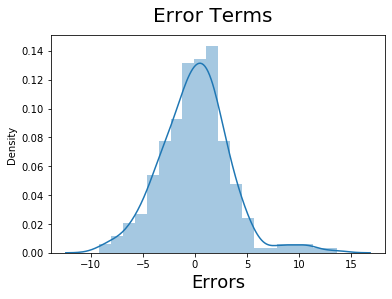

In [218]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     

### Making predictions with the final model

In [219]:
numeric = ['displacement', 'hp', 'weight', 'acceleration']

X_test[numeric] = scaler.transform(X_test[numeric])

In [220]:
X_test.describe()

,cylinders,displacement,hp,weight,acceleration,model_year,asia,europe
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,5.846939,0.321582,0.251934,0.260119,-0.198056,75.826531,0.173469,0.112245
std,1.731170,1.059242,0.997307,1.021807,0.945157,3.697381,0.380599,0.317290
min,4.000000,-1.118118,-1.464078,-1.560384,-2.577290,70.000000,0.000000,0.000000
25%,4.000000,-0.657950,-0.445504,-0.577394,-0.809257,73.000000,0.000000,0.000000
50%,6.000000,0.257492,-0.132097,0.094708,-0.225896,76.000000,0.000000,0.000000
75%,8.000000,1.160695,1.088886,1.086632,0.393364,79.000000,0.000000,0.000000
max,8.000000,2.631766,3.210915,2.640775,2.340893,82.000000,1.000000,1.000000


In [221]:
X_test_model5 = sm.add_constant(X_test)

In [222]:
X_test_model5 = X_test_model5.drop(['displacement', 'hp', 'acceleration', "cylinders"], axis = 1)

In [223]:
X_test_model5

,const,weight,model_year,asia,europe
39,1.0,1.835562,71,0,0
285,1.0,1.092290,79,0,0
164,1.0,0.138185,75,0,0
220,1.0,-1.164925,77,1,0
163,1.0,1.026777,75,0,0
...,...,...,...,...,...
101,1.0,-0.022620,73,0,0
9,1.0,1.104201,70,0,0
115,1.0,1.380546,73,0,0
12,1.0,0.998189,70,0,0


In [224]:
y_pred_model5 = model5.predict(X_test_model5)

In [225]:
y_pred_model5

39      9.741984
285    20.049389
164    21.525800
220    31.537218
163    17.081896
         ...    
101    20.682429
9      12.575786
115    13.665112
12     13.105957
262    21.697752
Length: 98, dtype: float64

Text(0, 0.5, 'y_pred')

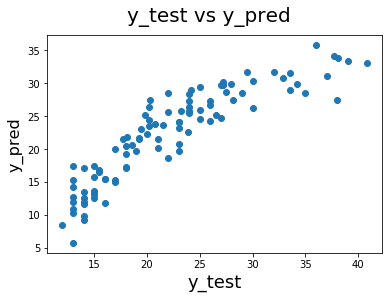

In [226]:
fig = plt.figure()
plt.scatter(y_test, y_pred_model5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

In [227]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     334.7
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          3.97e-107
Time:                        20:30:23   Log-Likelihood:                -771.82
No. Observations:                 294   AIC:                             1554.
Df Residuals:                     289   BIC:                             1572.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.5667      4.372     -9.050      0.000     -48.172     -30.962
weight        -5.0011      0.256    -19.537      0.000      -5.505      -4.497
model_year     0.8238      0.057     14.376      0.000       0.711       0.937
asia           1.8469      0.599      3.081      0.002       0.667       3.027
europe         2.1531      0.580      3.713      0.000       1.012       3.294
==============================================================================
Omnibus:                       22.333   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.625
Skew:                           0.430   Prob(JB):                     9.15e-10
Kurtosis:                       4.631   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The best fit model

### mpg = -39.567-5.00 * weight+0.82 * model_year+1.84 * asia+2.15 * europe

### Recursive Feature elimination

In [244]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [245]:
from sklearn.feature_selection import RFE
rfe = RFE(linear_regression, 7)             
rfe = rfe.fit(X_train, y_train)

In [246]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True])

In [247]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('cylinders', True, 1),
 ('displacement', True, 1),
 ('hp', False, 2),
 ('weight', True, 1),
 ('acceleration', True, 1),
 ('model_year', True, 1),
 ('asia', True, 1),
 ('europe', True, 1)]

In [248]:
col = X_train.columns[rfe.support_]

In [249]:
X_train.columns[~rfe.support_]

Index(['hp'], dtype='object')

In [250]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[col])
rfe_model = sm.OLS(y_train, X_train_lm).fit()

In [251]:
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.53e-105
Time:                        20:39:20   Log-Likelihood:                -766.76
No. Observations:                 294   AIC:                             1550.
Df Residuals:                     286   BIC:                             1579.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -40.1144      4.911     -8.169      0.000     -49.780     -30.448
cylinders       -0.2836      0.373     -0.760      0.448      -1.018       0.451
displacement     2.4184      0.919      2.633      0.009       0.610       4.226
weight          -6.3864      0.601    -10.635      0.000      -7.568      -5.204
acceleration     0.5943      0.246      2.414      0.016       0.110       1.079
model_year       0.8476      0.059     14.439      0.000       0.732       0.963
asia             2.4049      0.619      3.883      0.000       1.186       3.624
europe           2.8459      0.634      4.486      0.000       1.597       4.095
==============================================================================
Omnibus:                       15.015   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.216
Skew:                           0.359   Prob(JB):                     1.50e-05
Kurtosis:                       4.139   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
#Areas of improvement??